# Part 03
본 03 파트에서



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.5 MB/s eta 0:00:00


In [2]:
pip install scikit-posthocs

In [3]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00


In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [5]:
!pip install shap -q

In [6]:
df = pd.read_csv('/content/drive/MyDrive/week_hands_on_project5/whiskey/dataset/whisky_processed.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.head(2)

(1083, 34)


,name,whisky_type,volume(cl),alcohol(%),alcohol_density,price(£),price_per_cl,style_body,style_richness,style_smoke,style_sweetness,country,region,casktype,cask_group,bottler,bottler_group,is_independent,colouring,age,vintage,bottling_decade,is_vintage,has_age,has_bottling_decade,is_nas,characters,nose,palate,finish,food_paring,reviews,is_no_note,url
0,Blended Scotch TB-BSW6 Year Old Thompson Bros,blended,70.0,46.0,3220.0,34.25,0.489286,3.0,3.0,0.0,3.0,scotland,unknown_scotland,not specified,unknown,NaN,thompson bros,1,False,6.0,NaN,NaN,0,1,0,0,"Figs, Sultana, Cinnamon, Nutmeg, Toffee, Coffee","Plum sauce, miso, golden sultanas, cinder toff...","Golden sultanas, raisin loaf, buttered Jamaica...","Soft warm spice; allspice, nutmeg and cinnamon...",NaN,"Stunning stuff for the money, might well be my...",0,https://www.thewhiskyexchange.com/p/67983/blen...
1,Johnnie Walker Blue Label,blended,70.0,40.0,2800.0,158.00,2.257143,3.0,3.0,1.0,2.0,scotland,unknown_scotland,not specified,unknown,NaN,distillery bottling,0,True,NaN,NaN,NaN,0,0,0,1,"Rose, Hazelnut, Honey, Smoke, Dark Chocolate, ...","Smooth, silky cereal, syrupy flapjacks, polish...",A silky caress. Unexpectedly strong spicy entr...,A perfectly-integrated slow fade of the palate...,"Octopus, Monkfish, Fondue",Un elixir. || Excellent Whisky. Smooth on the ...,0,https://www.thewhiskyexchange.com/p/552/johnni...


# 제품 수집 현황

=== 국가별 제품 수 분포 ===


,country,count
0,scotland,796
1,ireland,120
2,japan,95
3,usa,72


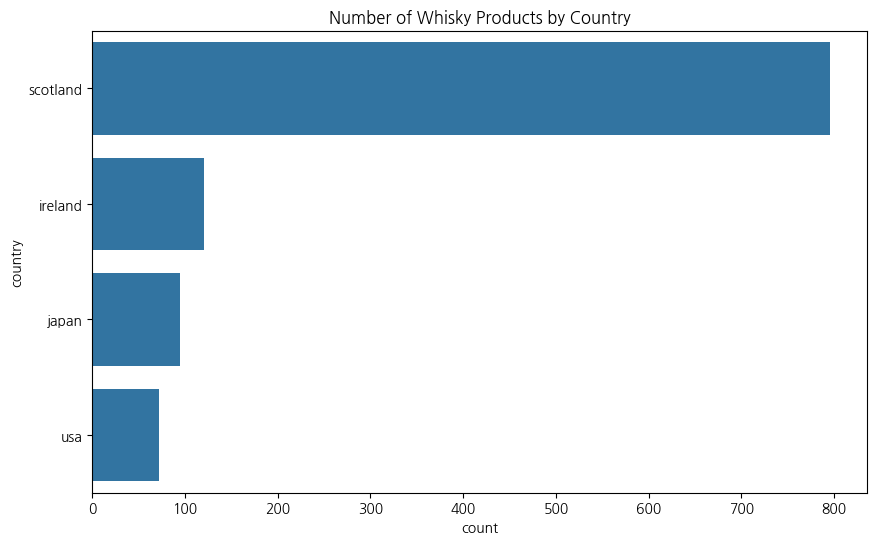



=== 위스키 타입별 분포 ===


,whisky_type,count
0,single malt,447
1,blended,347
2,blended malt,141
3,bourbon,45
4,grain,33
5,single pot still,32
6,rye,14
7,other,12
8,tennessee,11
9,corn,1




=== 타입별 국가 비중 ===


country,ireland,japan,scotland,usa
whisky_type,,,,
blended,41,15,291,0
blended malt,0,8,133,0
bourbon,0,0,0,45
corn,0,0,0,1
grain,5,4,24,0
other,3,4,3,2
rye,1,0,0,13
single malt,38,64,345,0
single pot still,32,0,0,0


country,ireland,japan,scotland,usa
whisky_type,,,,
blended,0.118,0.043,0.839,0.000
blended malt,0.000,0.057,0.943,0.000
bourbon,0.000,0.000,0.000,1.000
corn,0.000,0.000,0.000,1.000
grain,0.152,0.121,0.727,0.000
other,0.250,0.333,0.250,0.167
rye,0.071,0.000,0.000,0.929
single malt,0.085,0.143,0.772,0.000
single pot still,1.000,0.000,0.000,0.000


<Figure size 1400x600 with 0 Axes>

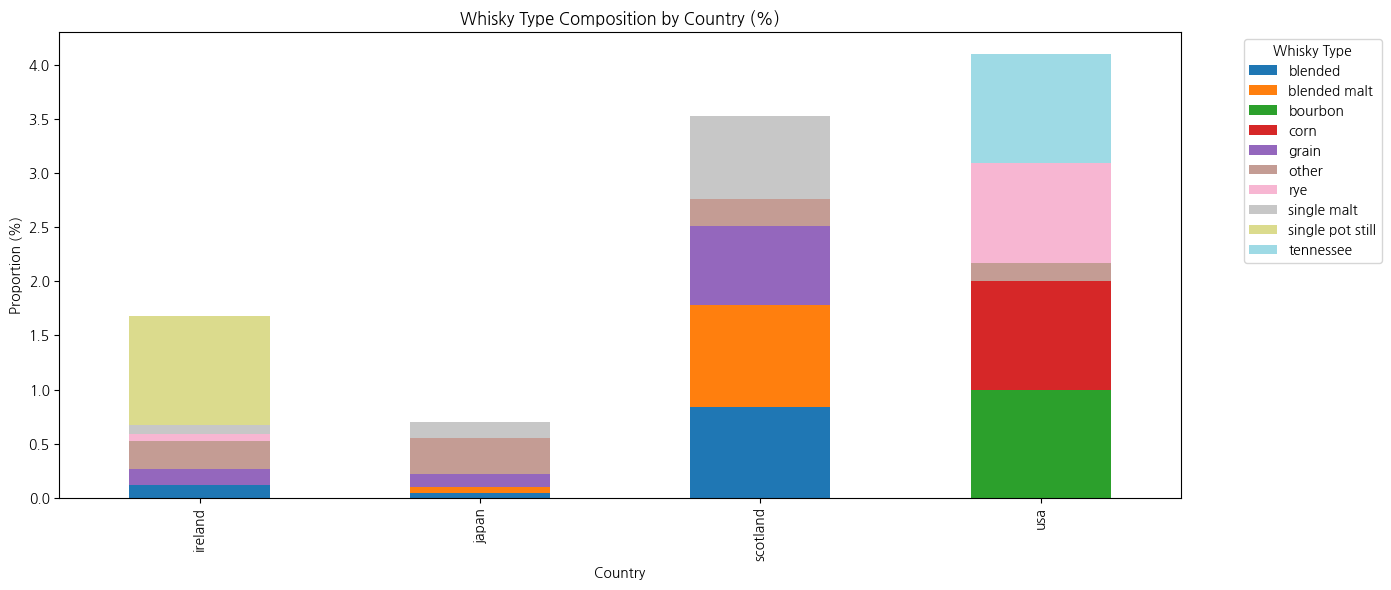

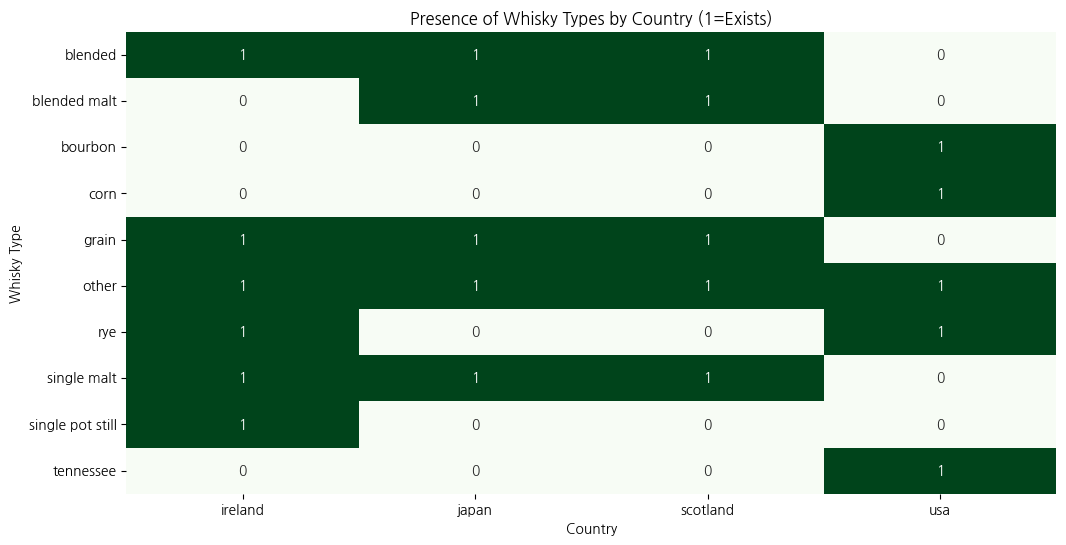

In [7]:
# 국가별 제품 수 분포

print("=== 국가별 제품 수 분포 ===")
country_counts = (
    df['country']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'country', 'count': 'count'})
)

display(country_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=country_counts, x='count', y='country')
plt.title("Number of Whisky Products by Country")
plt.show()

print("\n\n=== 위스키 타입별 분포 ===")
type_counts = df['whisky_type'].value_counts().reset_index()
type_counts.columns = ['whisky_type', 'count']
display(type_counts)

print("\n\n=== 타입별 국가 비중 ===")
type_country = (
    df.pivot_table(
        index='whisky_type',
        columns='country',
        values='name',
        aggfunc='count',
        fill_value=0
    )
)

display(type_country)
type_country_ratio = (
    type_country.div(type_country.sum(axis=1), axis=0)
    .round(3)
)

display(type_country_ratio)

plt.figure(figsize=(14, 6))
type_country_ratio.T.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='tab20'
)

plt.title("Whisky Type Composition by Country (%)")
plt.ylabel("Proportion (%)")
plt.xlabel("Country")
plt.legend(title="Whisky Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


presence = (type_country > 0).astype(int)

plt.figure(figsize=(12, 6))
sns.heatmap(presence, annot=True, cmap='Greens', cbar=False, fmt='d')
plt.title("Presence of Whisky Types by Country (1=Exists)")
plt.xlabel("Country")
plt.ylabel("Whisky Type")
plt.show()

In [8]:
df.describe()

,volume(cl),alcohol(%),alcohol_density,price(£),price_per_cl,style_body,style_richness,style_smoke,style_sweetness,is_independent,age,vintage,bottling_decade,is_vintage,has_age,has_bottling_decade,is_nas,is_no_note
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,618.000000,618.000000,618.000000,618.000000,1083.000000,524.000000,218.000000,193.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,73.384303,46.354451,3386.693564,550.994192,7.642938,3.095469,2.957929,0.572816,2.995146,0.253924,16.091603,1998.513761,1974.248705,0.201293,0.483841,0.178209,0.370268,0.372114
std,32.967562,6.162743,1458.912933,2198.978236,31.264083,0.732845,0.932839,1.055374,0.627549,0.435456,7.953931,14.833711,18.945654,0.401152,0.499970,0.382865,0.483099,0.483592
min,20.000000,40.000000,800.000000,9.950000,0.265333,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1937.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,40.000000,3000.000000,50.625000,0.730595,3.000000,2.000000,0.000000,3.000000,0.000000,12.000000,1990.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,45.200000,3220.000000,94.950000,1.332667,3.000000,3.000000,0.000000,3.000000,0.000000,14.000000,2000.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,50.000000,3548.000000,225.500000,3.214286,4.000000,4.000000,1.000000,3.000000,1.000000,20.000000,2010.000000,1980.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,900.000000,65.400000,39060.000000,29000.000000,414.285714,5.000000,5.000000,4.000000,5.000000,1.000000,56.000000,2022.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1️⃣ 스타일 변수 분석

## 분포 (Distribution)


      smoke 가 대부분 0-1인 것을 확인함
      ; smoke 별도 스케일링하거나 binary feature 추가

      sweetness 은 평균에 강하게 몰림
      ; 추천 모델에서 취향에 따라 가중치 사용 필요

In [9]:
style_cols = ['style_body', 'style_richness', 'style_smoke',
       'style_sweetness']

df_style = df[df[style_cols].notna().all(axis=1)]

In [10]:

style_cols = ['style_body', 'style_richness', 'style_smoke',
       'style_sweetness']

df_style = df[df[style_cols].notna().all(axis=1)]

display(df_style[style_cols].describe())

fig = px.violin(
    df_style.melt(value_vars=style_cols, var_name="Style", value_name="Score"),
    x="Style",
    y="Score",
    box=True,
    points="all",
    color="Style",
    title="Distribution of Whisky Style Attributes",
)

fig.update_layout(
    yaxis_title="Score (1–5)",
    xaxis_title="",
    font=dict(size=13),
    showlegend=False,
    plot_bgcolor="white"
)

fig.show()

,style_body,style_richness,style_smoke,style_sweetness
count,618.000000,618.000000,618.000000,618.000000
mean,3.095469,2.957929,0.572816,2.995146
std,0.732845,0.932839,1.055374,0.627549
min,1.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,0.000000,3.000000
50%,3.000000,3.000000,0.000000,3.000000
75%,4.000000,4.000000,1.000000,3.000000
max,5.000000,5.000000,4.000000,5.000000


In [11]:
# 3 이상인 smoke 지표에 대해서 표시
df['strong_smoke'] = df['style_smoke'].apply(lambda x : 1 if x >= 3 else 0)

## 결측치 패턴 분석 (Missing Value Pattern)

📎  <결과>
    
      * (문제 발견) 포함된 제품 수가 많으면서 style 지표에 대한 정보가 대부분 없는
          - scotland blended, ireland blended 는 추천 시스템과 진열 전략에서 조치가 필요함.
      

In [12]:
display(df[style_cols].isna().agg(tuple, axis=1).value_counts())

df['style_missing'] = df[style_cols].isna().all(axis=1).astype(int)

group_cols = ['whisky_type', 'region']

for g in group_cols:
    print(f"---- {g} ----")
    display(df.groupby(g)['style_missing'].mean().sort_values(ascending=False))
    print()



# groupby: mean + 전체 표본 수(size)
g = (
    df.groupby(['country', 'whisky_type'])['style_missing']
      .agg(mean='mean')              # 평균
      .reset_index()
)

# 전체 표본 수 (style_missing의 null 여부와 상관 없음)
g['count'] = (
    df.groupby(['country', 'whisky_type'])
      .size()
      .values
)

# label 생성
g['label'] = g['country'] + " - " + g['whisky_type']

# 바 옆에 표시할 표본 수
g['text_label'] = g['count'].astype(str)

# Plotly bar chart
fig = px.bar(
    g.sort_values('mean', ascending=False),
    x='mean',
    y='label',
    orientation='h',
    text='text_label',
    labels={'mean': 'style_missing_mean', 'label': ''},
    title="Style Missing Mean by Country & Whisky Type (+ 표본 수)",
)

# text 스타일
fig.update_traces(
    textposition='outside',
    textfont=dict(size=12),
    marker_color="#E9E3DF"
)

# 0.5 기준선
fig.add_vline(
    x=0.5,
    line_dash="dash",
    line_color="red",
    line_width=2,
    opacity=0.7
)

fig.update_layout(
    height=900,
    yaxis={'categoryorder': 'total ascending'},
    plot_bgcolor='white'
)

fig.show()

,count
"(False, False, False, False)",618
"(True, True, True, True)",465


---- whisky_type ----


,style_missing
whisky_type,
blended,0.659942
other,0.583333
blended malt,0.361702
grain,0.333333
single malt,0.315436
bourbon,0.288889
single pot still,0.250000
rye,0.214286
tennessee,0.181818



---- region ----


,style_missing
region,
vermont,1.000000
campbeltown,0.833333
unknown_scotland,0.605839
illinois,0.500000
island,0.400000
unknown_japan,0.389474
unknown_ireland,0.341667
highland,0.333333
kentucky,0.312500


## 특성 관계 (Correlation)


📎 <결과> <Br>
**상관관계 분석** 결과, <br>
스타일 지표들은 전체적으로 높은 상관이 없고 비교적 독립적이다. <br>
단, body와 richness는 개념적으로도 가까운 축이기 때문에 어느 정도 상관이 존재한다.
  
      •	Body vs Richness: r = 0.55 (중간 수준의 양의 상관)
    이 두 변수는 서로 밀접하게 움직이며, 스타일의 “풍부함/무게감”을 함께 설명하는 경향이 있다.
      •	Smoke vs Sweetness: r = -0.29 (약한 음의 상관)
    스모키한 위스키일수록 달콤함은 상대적으로 낮은 경향을 보인다.
      •	그 외 모든 조합은 상관이 매우 낮음(r = 0~0.2)
    서로 다른 감각적 축을 잘 분리해서 설명하고 있음.

 **다중공산성 진단** 결과, <br>
Body, Richness, Sweetness는 다른 변수들과 결합될 경우 선형적 중복성이 크게 나타날 수 있음.<br> 다만, 상관이 아주 높은 편은 아니며 회귀 분석 시 주의할 정도로만 해석함

                          VIF
        style_body     24.615202
      style_richness   15.720109
        style_smoke     1.365696
      style_sweetness  14.116429



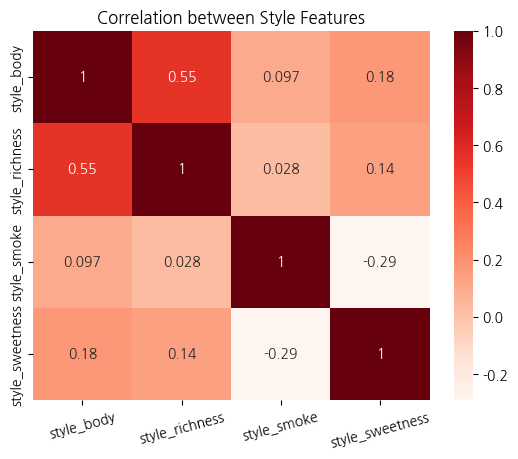

           feature        VIF
0       style_body  24.615202
1   style_richness  15.720109
2      style_smoke   1.365696
3  style_sweetness  14.116429


In [13]:
style_cols = ['style_body', 'style_richness', 'style_smoke',
       'style_sweetness']

# 히트맵
sns.heatmap(df_style[style_cols].dropna().corr(method='pearson'), annot=True, cmap="Reds")
plt.title("Correlation between Style Features")

plt.xticks(rotation=15)
plt.show()

#보조: 공산성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_style[style_cols].dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


## 그룹별 차이 비교 (Comparison)

### 위스키 타입별 차이

📎  <결과>

      •	 네 가지 스타일 지표 모두 위스키 타입에 따라 **통계적으로 유의한 차이**가 존재.
      •	 style_smoke와 style_sweetness : 타입을 구분하는 **분별력 높은 감각 지표**.
      •	 style_body와 style_richness : 전체적으로 **차이가 있으나** 개별 쌍 **구분력은 약함**.
      •	 이 결과는 타입 기반 스타일 프로파일링 및
        추천 시스템의 기본 감각 축 설정에 활용할 수 있음.

1. **정규성 검정** : 해당 타입의 스타일 점수 분포가 정규 분포인지 확인 (판단 기준 : p-value)
2. **등분산 검정** : 각 타입 그룹 간의 분산이 동일한지 확인 (판단 기준 : p-value)
3. **ANOVA vs Kruskal-Wallis** : 위 두가지 결과에 따라 둘 중 선택해서 실행됨
4. **Dunn 사후 검정** : 어떤 타입 쌍 사이에 차이가 존재하는지 확인

In [14]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools

# 축 라벨 및 컬럼
data_cols   = ['style_richness', 'style_body','style_smoke','style_sweetness']
axis_labels = ['Rich','Body','Smoke','Sweet']

color_palette = itertools.cycle(px.colors.qualitative.Bold)

types = df_style["whisky_type"].dropna().unique().tolist()
n = len(types)
cols = min(3, n)
rows = (n + cols - 1)//cols

fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{"type": "polar"} for _ in range(cols)] for _ in range(rows)],
    horizontal_spacing=0.12,
    vertical_spacing=0.18
)

r_i, c_i = 1, 1
for t in types:
    sub = df_style[df_style["whisky_type"]==t].copy()
    sub[data_cols] = sub[data_cols].clip(lower=1, upper=5)

    color_cycle = itertools.cycle(px.colors.qualitative.Bold)

    for _, row in sub.iterrows():
        vals = [row[c] for c in data_cols]
        color = next(color_cycle)

        fig.add_trace(
            go.Scatterpolar(
                r=vals + [vals[0]],
                theta=axis_labels + [axis_labels[0]],
                mode="lines+markers",
                line=dict(width=1.5, color=color),
                marker=dict(size=5, color=color),
                opacity=0.75,
                hovertemplate=(
                    f"<b>{row.get('name','(no name)')}</b><br>"
                    f"region: {row.get('region','-')}<br>"
                    f"rich: {row['style_richness']} | body: {row['style_body']}<br>"
                    f"smoke: {row['style_smoke']} | sweet: {row['style_sweetness']}"
                    "<extra></extra>"
                ),
                showlegend=False
            ),
            row=r_i, col=c_i
        )

    # 폴라 축 디자인
    fig.update_polars(
        radialaxis=dict(
            range=[0.9, 5.1],
            tickvals=[1,2,3,4,5],
            tickfont=dict(size=10, color="#4a2b2e"),
            gridcolor="rgba(74,43,46,0.15)"
        ),
        angularaxis=dict(
            tickfont=dict(size=11, color="#4a2b2e"),
            gridcolor="rgba(74,43,46,0.15)"
        ),
        bgcolor="rgba(255,255,255,0.35)",
        row=r_i, col=c_i
    )

    # 타입 제목 annotation
    key = "" if (r_i == 1 and c_i == 1) else (c_i + (r_i-1)*cols)
    dom = fig.layout[f"polar{key}"].domain
    fig.add_annotation(
        x=(dom.x[0]+dom.x[1])/2, y=dom.y[1]+0.023,
        text=t, showarrow=False, xref="paper", yref="paper",
        font=dict(size=14, color="#4a2b2e", family="Arial")
    )

    c_i += 1
    if c_i > cols:
        c_i = 1
        r_i += 1

# 전체 레이아웃
fig.update_layout(
    title="Whisky Radar by Type (rich/body/smoke/sweet)",
    height=max(360*rows, 420),
    margin=dict(l=40,r=40,t=60,b=30),
    paper_bgcolor="#f9f4f2",
    plot_bgcolor="#f9f4f2",
    hoverlabel=dict(
        bgcolor="grey",
        font=dict(color="#4a2b2e", size=12)
    ),
    font=dict(family="Arial", color="#4a2b2e")
)

fig.show()

<style_richness>
------------------------------------

blended 정규성(p): 4.58330121752971e-09
grain 정규성(p): 0.007486524751176419
bourbon 정규성(p): 0.0008298358249883599
tennessee 정규성(p): 0.36442735256241976
rye 정규성(p): 0.034557769903301915
corn 정규성(p): nan
other 정규성(p): 0.006470000644485464
single malt 정규성(p): 1.2746673846994831e-14
blended malt 정규성(p): 7.971979758920512e-08
single pot still 정규성(p): 0.02150047030391077
등분산성(p): 0.8393820110261843
Kruskal-Wallis p-value: 0.005127870861079428
                   blended  blended malt  bourbon  corn     grain     other  \
blended           1.000000      1.000000      1.0   1.0  1.000000  1.000000   
blended malt      1.000000      1.000000      1.0   1.0  1.000000  1.000000   
bourbon           1.000000      1.000000      1.0   1.0  1.000000  1.000000   
corn              1.000000      1.000000      1.0   1.0  1.000000  1.000000   
grain             1.000000      1.000000      1.0   1.0  1.000000  0.882622   
other             1.000000      1.

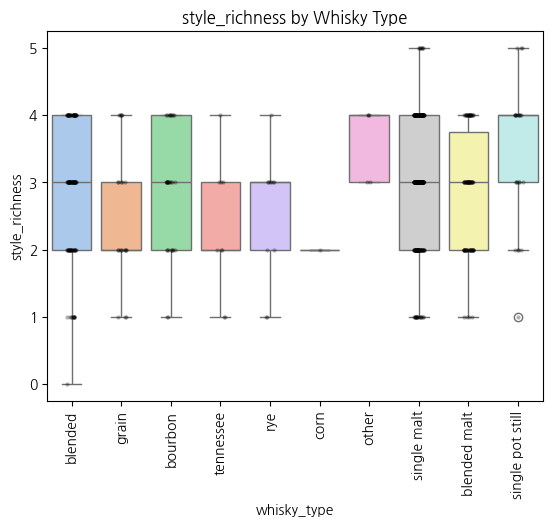


------------------------------------

<style_body>
------------------------------------

blended 정규성(p): 6.822461114968016e-12
grain 정규성(p): 0.006544250008844085
bourbon 정규성(p): 0.0004184583692901703
tennessee 정규성(p): 0.27288587932875047
rye 정규성(p): 0.18066430513846765
corn 정규성(p): nan
other 정규성(p): 0.00013097817774592824
single malt 정규성(p): 1.851087196847965e-18
blended malt 정규성(p): 1.1646188841434393e-09
single pot still 정규성(p): 0.002605309874756297
등분산성(p): 0.07344940499288084
Kruskal-Wallis p-value: 0.00016824247158432598
                   blended  blended malt   bourbon     corn     grain  \
blended           1.000000      1.000000  1.000000  1.00000  1.000000   
blended malt      1.000000      1.000000  1.000000  1.00000  1.000000   
bourbon           1.000000      1.000000  1.000000  1.00000  1.000000   
corn              1.000000      1.000000  1.000000  1.00000  1.000000   
grain             1.000000      1.000000  1.000000  1.00000  1.000000   
other             0.691329   

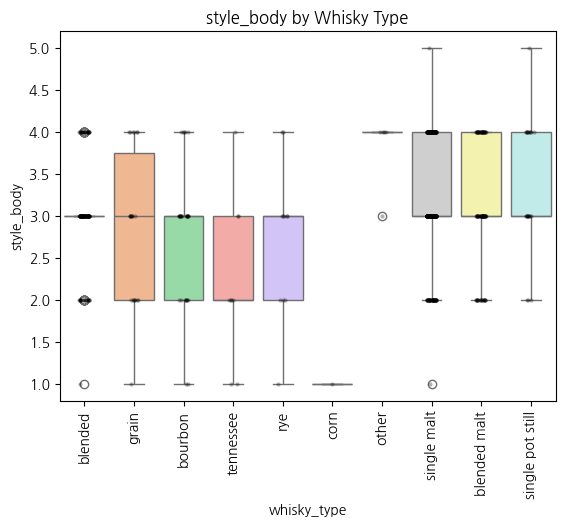


------------------------------------

<style_smoke>
------------------------------------

blended 정규성(p): 1.958958815735261e-12
grain 정규성(p): 7.417016185076831e-10
bourbon 정규성(p): 6.434629493448542e-11
tennessee 정규성(p): 1.6860247010443015e-05
rye 정규성(p): 1.0208570838437076e-06
corn 정규성(p): nan
other 정규성(p): 0.0315732058481267
single malt 정규성(p): 1.7487070200610668e-28
blended malt 정규성(p): 1.0405112511270336e-10
single pot still 정규성(p): 2.1855562899695928e-10
등분산성(p): 1.0159332856954917e-17
Kruskal-Wallis p-value: 1.0774181294147316e-13
                       blended  blended malt   bourbon  corn     grain  other  \
blended           1.000000e+00  1.000000e+00  0.000525   1.0  0.001733    1.0   
blended malt      1.000000e+00  1.000000e+00  0.000116   1.0  0.000455    1.0   
bourbon           5.249765e-04  1.156587e-04  1.000000   1.0  1.000000    1.0   
corn              1.000000e+00  1.000000e+00  1.000000   1.0  1.000000    1.0   
grain             1.732592e-03  4.545387e-04  1.0000

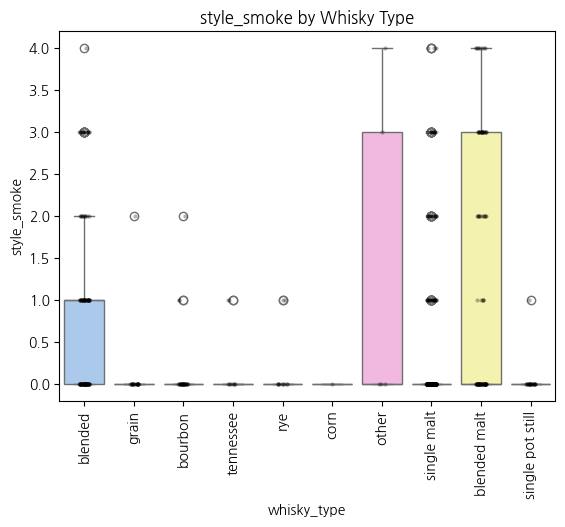


------------------------------------

<style_sweetness>
------------------------------------

blended 정규성(p): 1.4108204140236437e-13
grain 정규성(p): 0.005897915705387812
bourbon 정규성(p): 0.00019061715073685713
tennessee 정규성(p): 0.012213137284604695
rye 정규성(p): 0.00906024498874218
corn 정규성(p): nan
other 정규성(p): 0.00013097817774592824
single malt 정규성(p): 1.5600473036366651e-21
blended malt 정규성(p): 2.6218358502935906e-11
single pot still 정규성(p): 5.14563443467566e-06
등분산성(p): 0.2850641602861712
Kruskal-Wallis p-value: 0.0013333193275838478
                   blended  blended malt  bourbon      corn     grain  other  \
blended           1.000000      1.000000      1.0  1.000000  1.000000    1.0   
blended malt      1.000000      1.000000      1.0  1.000000  1.000000    1.0   
bourbon           1.000000      1.000000      1.0  1.000000  1.000000    1.0   
corn              1.000000      1.000000      1.0  1.000000  1.000000    1.0   
grain             1.000000      1.000000      1.0  1.000000 

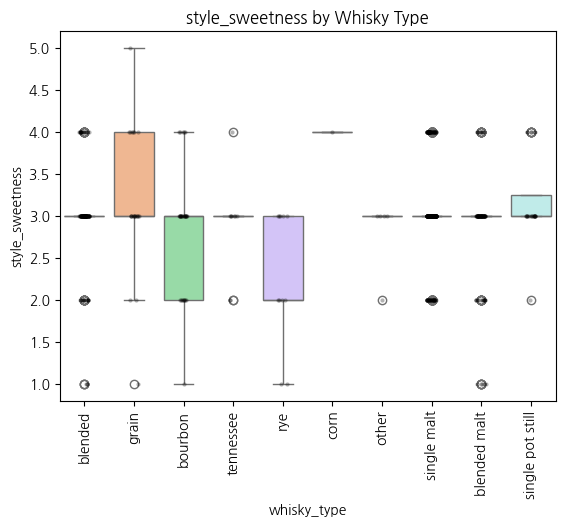


------------------------------------



In [15]:
from scipy import stats
import scikit_posthocs as sp

def style_whisky_type_stats_val(df = df_style, style='style_richness'):

  groups = [df[df['whisky_type']==t][style] for t in df['whisky_type'].unique()]
  print(f"<{style}>\n------------------------------------\n")
  # 1 정규성, 등분산성 먼저 확인
  for t in df['whisky_type'].unique():
      data = df.loc[df['whisky_type']==t, style]
      print(t, "정규성(p):", stats.shapiro(data)[1])

  print("등분산성(p):", stats.levene(*groups)[1])

  # 2 ANOVA or Kruskal 선택
  if all(stats.shapiro(df.loc[df['whisky_type']==t, style])[1] > 0.05 for t in df['whisky_type'].unique()) \
    and stats.levene(*groups)[1] > 0.05:
      # 조건 충족 -> ANOVA
      f, p = stats.f_oneway(*groups)
      print("ANOVA p-value:", p)
  else:
      # 조건 불충족 -> Kruskal
      h, p = stats.kruskal(*groups)
      print("Kruskal-Wallis p-value:", p)

  # 3 사후검정 (유의미하면)
  if p < 0.05:
      result = sp.posthoc_dunn(df, val_col=style, group_col='whisky_type', p_adjust='bonferroni')
      print(result)

  sns.boxplot(data=df, x='whisky_type', y=style, palette='pastel')
  sns.stripplot(data=df, x='whisky_type', y=style, color='k', alpha=0.3, size=3)
  plt.xticks(rotation=90)
  plt.title(f"{style} by Whisky Type")
  plt.show()
  print(f"\n------------------------------------\n")



for style in ['style_richness', 'style_body', 'style_smoke', 'style_sweetness']:
  style_whisky_type_stats_val(df= df_style, style = style)



### 지역별 차이

📎  <결과>
<Br>
**전반적으로 지역별로 스타일을 구별할 수 있는 유의미한 차이**를 보임.

    •	Smoke 스타일은 지역 특성이 거의 완벽하게 반영되는 축이다.
	•	Body와 Sweetness도 지역 간 유의미한 차이를 보인다.


    지역별 그룹 비교 분석 결과,
    Smoke 스타일은 지역 간 차이가 매우 뚜렷하여
    Islay를 중심으로 한 강한 지역 시그니처가 통계적으로 확인되었다.
    Sweetness와 Body는 일부 지역에서만 제한적인 차이를 보였으며,
    Richness는 지역 구분 변수로서 유의미하지 않았다.

    이에 따라 본 추천 시스템에서는
    Region을 Smoke 기반 유사도의 보조 지표이자,
    스타일 정보 결측 시 fallback 변수로 활용하였다.

In [16]:
df_style.groupby(by='region')[style_cols].agg(["mean","median","std","count"])

style_body                        style_richness         \
                       mean median       std count           mean median   
region                                                                     
campbeltown        4.000000    4.0       NaN     1       3.000000    3.0   
highland           2.500000    2.0  1.069045     8       2.125000    2.0   
illinois           2.000000    2.0       NaN     1       2.000000    2.0   
island             2.666667    3.0  0.577350     3       2.333333    2.0   
islay              3.250000    3.0  0.707107     8       2.875000    3.0   
kentucky           2.636364    3.0  0.895062    33       2.878788    3.0   
lowland            3.000000    3.0  0.534522     8       2.375000    2.0   
nevada             3.000000    3.0       NaN     1       3.000000    3.0   
new york           2.500000    2.5  0.707107     2       2.500000    2.5   
speyside           3.214286    3.0  0.681496   238       3.096639    3.0   
tennessee          2.222222    2.0  0.971825     9       2.333333    2.0   
unknown_ireland    3.139241    3.0  0.711340    79       2.898734    3.0   
unknown_japan      3.000000    3.0  0.725476    58       2.896552    3.0   
unknown_scotland   3.104938    3.0  0.692534   162       2.956790    3.0   
unknown_usa        3.428571    3.0  0.534522     7       2.857143    3.0   

                                 style_smoke                         \
                       std count        mean median       std count   
region                                                                
campbeltown            NaN     1    3.000000    3.0       NaN     1   
highland          0.834523     8    0.375000    0.0  0.744024     8   
illinois               NaN     1    0.000000    0.0       NaN     1   
island            0.577350     3    3.000000    3.0  0.000000     3   
islay             0.991031     8    3.500000    4.0  0.755929     8   
kentucky          0.892944    33    0.181818    0.0  0.464660    33   
lowland           1.060660     8    0.250000    0.0  0.707107     8   
nevada                 NaN     1    0.000000    0.0       NaN     1   
new york          2.121320     2    0.000000    0.0  0.000000     2   
speyside          0.878187   238    0.243697    0.0  0.699203   238   
tennessee         1.000000     9    0.222222    0.0  0.440959     9   
unknown_ireland   1.020243    79    0.151899    0.0  0.622003    79   
unknown_japan     1.087241    58    0.931034    1.0  1.057340    58   
unknown_scotland  0.872981   162    1.092593    1.0  1.279584   162   
unknown_usa       0.899735     7    0.000000    0.0  0.000000     7   

                 style_sweetness                         
                            mean median       std count  
region                                                   
campbeltown             3.000000    3.0       NaN     1  
highland                2.750000    3.0  0.462910     8  
illinois                2.000000    2.0       NaN     1  
island                  1.333333    1.0  0.577350     3  
islay                   2.500000    3.0  0.755929     8  
kentucky                2.757576    3.0  0.867118    33  
lowland                 2.875000    3.0  1.356203     8  
nevada                  2.000000    2.0       NaN     1  
new york                3.000000    3.0  0.000000     2  
speyside                3.105042    3.0  0.544919   238  
tennessee               2.888889    3.0  0.600925     9  
unknown_ireland         3.189873    3.0  0.579034    79  
unknown_japan           2.810345    3.0  0.475981    58  
unknown_scotland        2.950617    3.0  0.628539   162  
unknown_usa             2.857143    3.0  0.377964     7

In [17]:
from scipy.stats import kruskal

regions = df_style["region"].unique()

for col in style_cols:
    groups = [df_style.loc[df_style["region"]==r, col].dropna() for r in regions]
    stat, p = kruskal(*groups)
    print(col, p)

style_body 0.000800545096644861
style_richness 0.08451132542530601
style_smoke 1.019142645987292e-26
style_sweetness 1.3267361772333531e-05


In [18]:
import scikit_posthocs as sp

for col in style_cols:
    print(col)
    post = sp.posthoc_dunn(df_style, val_col=col, group_col='region', p_adjust='bonferroni')
    display(post)

style_body


,campbeltown,highland,illinois,island,islay,kentucky,lowland,nevada,new york,speyside,tennessee,unknown_ireland,unknown_japan,unknown_scotland,unknown_usa
campbeltown,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
highland,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
illinois,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
island,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
islay,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
kentucky,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.027116,1.000000,0.681385,1.0,0.564395,1.000000
lowland,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
nevada,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
new york,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
speyside,1.0,1.0,1.0,1.0,1.0,0.027116,1.0,1.0,1.0,1.000000,0.091092,1.000000,1.0,1.000000,1.000000


style_richness


,campbeltown,highland,illinois,island,islay,kentucky,lowland,nevada,new york,speyside,tennessee,unknown_ireland,unknown_japan,unknown_scotland,unknown_usa
campbeltown,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
highland,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.529785,1.0,1.0,1.0,1.0,1.0
illinois,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
island,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
islay,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
kentucky,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
lowland,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
nevada,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
new york,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0
speyside,1.0,0.529785,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0


style_smoke


,campbeltown,highland,illinois,island,islay,kentucky,lowland,nevada,new york,speyside,tennessee,unknown_ireland,unknown_japan,unknown_scotland,unknown_usa
campbeltown,1.0,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
highland,1.0,1.000000,1.0,0.288721,2.214417e-03,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
illinois,1.0,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
island,1.0,0.288721,1.0,1.000000,1.000000e+00,2.085301e-02,0.091157,1.0,0.583633,1.202018e-02,0.149010,5.309424e-03,1.000000,1.000000e+00,0.025667
islay,1.0,0.002214,1.0,1.000000,1.000000e+00,2.895033e-07,0.000263,1.0,0.092080,7.817286e-09,0.000484,2.293893e-09,0.006429,4.388473e-03,0.000039
kentucky,1.0,1.000000,1.0,0.020853,2.895033e-07,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,0.014421,7.204336e-04,1.000000
lowland,1.0,1.000000,1.0,0.091157,2.632525e-04,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
nevada,1.0,1.000000,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
new york,1.0,1.000000,1.0,0.583633,9.207974e-02,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
speyside,1.0,1.000000,1.0,0.012020,7.817286e-09,1.000000e+00,1.000000,1.0,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000002,4.328058e-15,1.000000


style_sweetness


,campbeltown,highland,illinois,island,islay,kentucky,lowland,nevada,new york,speyside,tennessee,unknown_ireland,unknown_japan,unknown_scotland,unknown_usa
campbeltown,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
highland,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
illinois,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
island,1.0,1.0,1.0,1.000000,1.000000,0.721298,0.572016,1.0,1.0,0.032981,1.0,0.014606,0.774650,0.145431,1.0
islay,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.680777,1.000000,1.000000,1.0
kentucky,1.0,1.0,1.0,0.721298,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,0.336497,1.000000,1.000000,1.0
lowland,1.0,1.0,1.0,0.572016,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
nevada,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
new york,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0
speyside,1.0,1.0,1.0,0.032981,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,0.056112,1.000000,1.0


### 가격별 차이

  📎  <결과> <br>


    Spearman 상관분석 결과,
    Body(ρ=0.33)와 Richness(ρ=0.31)는 가격과 유의미한 단조 증가 관계를 보였다.
    반면 Smoke는 가격과 유의한 관계가 없었으며,
    Sweetness는 통계적으로 유의하나 효과 크기는 매우 작았다.

    Distance correlation 분석에서는
    모든 스타일 변수에서 전역적으로 강한 비선형 의존 구조는 관측되지 않았다.
    이를 통해 Body와 Richness는 가격을 직접 결정하는 변수라기보다는,
    프리미엄 구간에서 인식 강도를 보정하는 스타일 지표로 해석하였다.


1. Spearman 상관분석
2. Distance Correlation

In [19]:
import scipy.stats as stats

spearman_results = {}
for col in style_cols:
    rho, p = stats.spearmanr(df_style[col], df_style["price(£)"], nan_policy='omit')
    spearman_results[col] = {"rho": rho, "p-value": p}

spearman_results

{'style_body': {'rho': np.float64(0.33382552667072046),
  'p-value': np.float64(1.4914883567433496e-17)},
 'style_richness': {'rho': np.float64(0.3135503559463595),
  'p-value': np.float64(1.4504738701179077e-15)},
 'style_smoke': {'rho': np.float64(-0.038211745217185344),
  'p-value': np.float64(0.34295022045865997)},
 'style_sweetness': {'rho': np.float64(0.0884016109803114),
  'p-value': np.float64(0.02798592131734467)}}

    - Body (0.334) : 가격 증가와 양(+) 관계
    바디감이 높을수록 가격도 증가하는 경향

    - Richness (0.314) : 가격과 양의 관계 두 번째로 높음
    고가 위스키는 풍미가 풍부한 경향

    - Smoke (–0.038, 비유의) : 가격과 거의 관계 없음
    스모크는 가격 전략보다 ‘취향 세그먼트’에 가깝다.

    - Sweetness (0.088) : 아주 약한 양의 관계

In [20]:
import dcor
# distance correlation
dcor_results = {}
for col in style_cols:
    d = dcor.distance_correlation(df_style[col].fillna(0), df_style["price(£)"].fillna(0))
    dcor_results[col] = d

dcor_results

{'style_body': np.float64(0.12764259695198282),
 'style_richness': np.float64(0.12583101636037053),
 'style_smoke': np.float64(0.09043006510572014),
 'style_sweetness': np.float64(0.07862004054654506)}

    - Body (0.128 ) : 약한 비선형 관계
    - Richness (0.126) : 약한 비선형
    - Smoke (0.090) : 약한/거의 없음
    - Sweetness (0.0786 ) : 관계 없음에 가까움

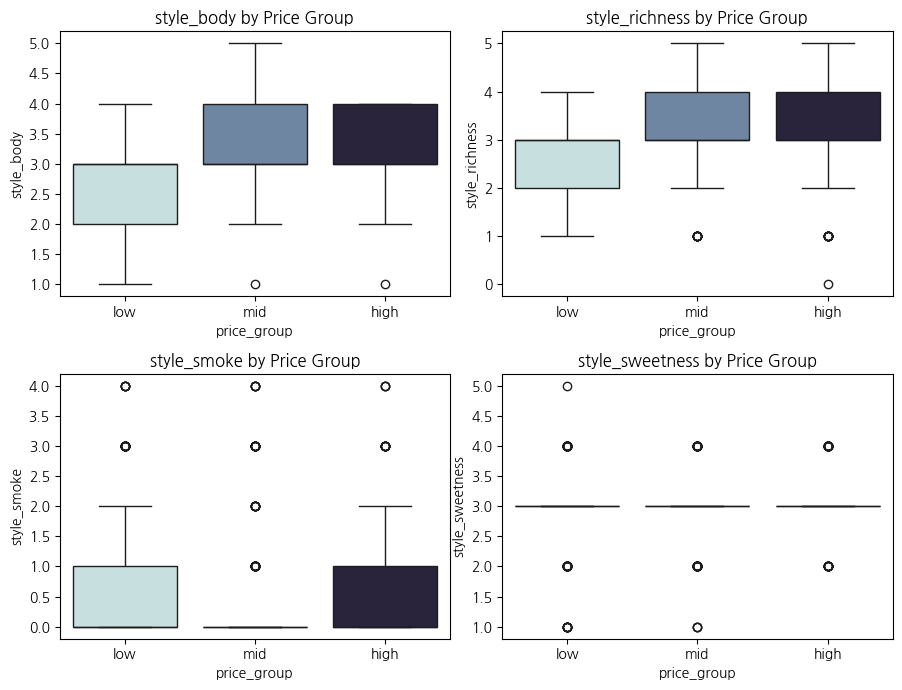

In [21]:
df_style["price_group"] = pd.qcut(df_style["price(£)"], q=3, labels=["low", "mid", "high"])
df_style.groupby("price_group")[style_cols].mean().round(2)


fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()


for i, col in enumerate(style_cols):
    sns.boxplot(x="price_group", y=col, data=df_style, ax=axes[i], palette="ch:start=.2,rot=-.3")
    axes[i].set_title(f"{col} by Price Group")

plt.tight_layout()
plt.show()

### 연식별 차이

📎  <결과>

    LOWESS 기반 비선형 추세 분석 결과,
    Body와 Richness는 숙성 연수 증가에 따라 상승하는 경향을 보였으나,
    Smoke와 Sweetness는 연령과 유의미한 관계를 보이지 않았다.
    이는 숙성이 위스키의 ‘강도와 밀도’에는 영향을 주지만,
    맛의 방향성 자체를 결정하지는 않음을 시사한다.


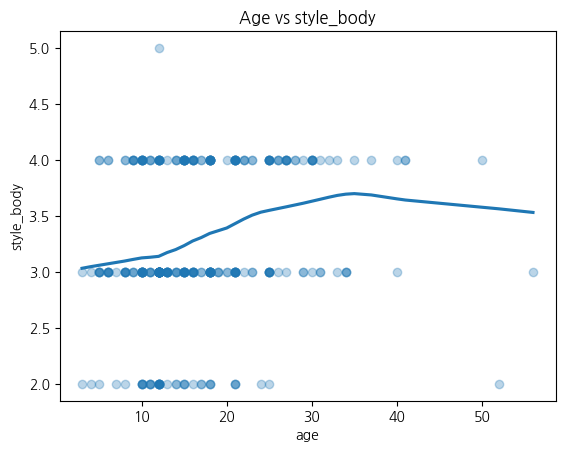

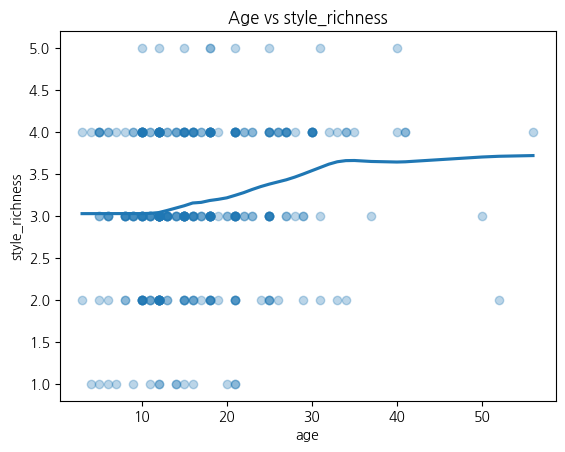

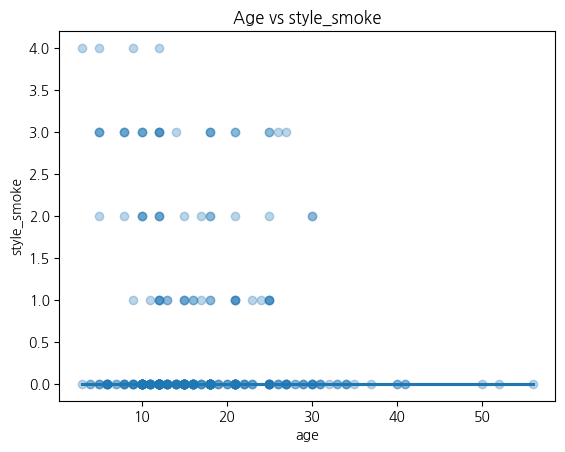

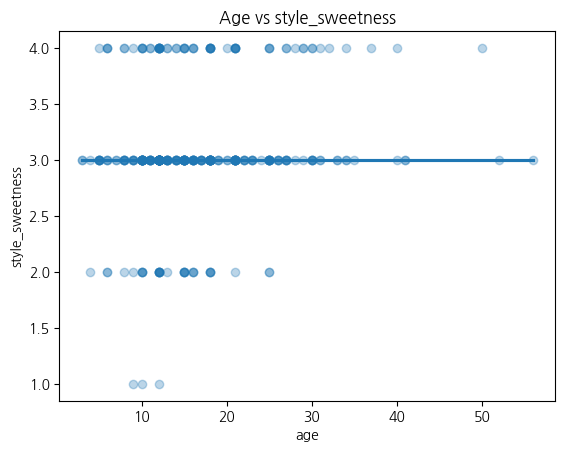

In [22]:
# LOWESS 기반 비선형 추세 분석
import statsmodels.api as sm

for col in style_cols:
    sns.regplot(
        data=df_style, x="age", y=col, lowess=True, scatter_kws={'alpha':0.3}
    )
    plt.title(f"Age vs {col}")
    plt.show()

### 캐스크 타입별


📎  <결과>

소수(sherry, alt_wood, unknown) 외에 <br>
사후검정에서는 대부분 유의미한 쌍이 **거의 없음**.  <br>
즉, 카스크 타입이 스타일을 예측하는 변수로는 **약한 신호** (진열 전략에서 보조적으로 사용)

      유의미한 조합들
      body : sherry vs alt_wood
      richness : **alt_wood vs  sherry / wine_port**,
                 sherry vs unknown
      smoke : unknown vs bourbon / sherry ,
			        wine_port vs others
      sweetness : brandy_cognac vs alt_wood,
				  unknown vs bourbon / brandy_cognac/rum/sherry

✅ sherry - 여러 스타일에서 특정 그룹과 강한 차이를 보임.<br>
✅ unknown - smoke 와 sweetness에서 p-value 낮음 <br>
✅ alt_wood - richness에서 유독 다른 분포 <br>

In [23]:
df_style.groupby(by='cask_group')[['style_body', 'style_richness', 'style_smoke', 'style_sweetness']].agg(["mean","median","std","count"])

style_body                        style_richness         \
                         mean median       std count           mean median   
cask_group                                                                   
alt_wood             2.555556    2.0  0.881917     9       1.888889    2.0   
bourbon              3.181818    3.0  0.756155    77       3.000000    3.0   
brandy_cognac        3.285714    3.0  0.487950     7       2.714286    3.0   
other_experimental   2.000000    2.0       NaN     1       1.000000    1.0   
others               2.562500    3.0  0.512348    16       3.062500    3.0   
rum                  3.100000    3.0  0.737865    10       2.900000    3.0   
sherry               3.326531    3.0  0.638547    98       3.234694    3.0   
unknown              3.040872    3.0  0.750932   367       2.891008    3.0   
wine_port            3.212121    3.0  0.545297    33       3.151515    3.0   

                                   style_smoke                         \
                         std count        mean median       std count   
cask_group                                                              
alt_wood            0.927961     9    0.111111    0.0  0.333333     9   
bourbon             1.051315    77    0.246753    0.0  0.813631    77   
brandy_cognac       0.755929     7    0.571429    0.0  1.133893     7   
other_experimental       NaN     1    0.000000    0.0       NaN     1   
others              0.853913    16    0.875000    0.0  1.310216    16   
rum                 0.875595    10    0.300000    0.0  0.948683    10   
sherry              0.757111    98    0.275510    0.0  0.783603    98   
unknown             0.934524   367    0.765668    0.0  1.149777   367   
wine_port           0.870388    33    0.151515    0.0  0.565752    33   

                   style_sweetness                         
                              mean median       std count  
cask_group                                                 
alt_wood                  2.777778    3.0  0.440959     9  
bourbon                   3.116883    3.0  0.606414    77  
brandy_cognac             3.571429    4.0  0.534522     7  
other_experimental        3.000000    3.0       NaN     1  
others                    3.000000    3.0  0.632456    16  
rum                       3.500000    3.5  0.527046    10  
sherry                    3.142857    3.0  0.537271    98  
unknown                   2.888283    3.0  0.645327   367  
wine_port                 3.242424    3.0  0.501890    33

In [24]:
from scipy.stats import kruskal

results = {}
for col in style_cols:
    groups = [df_style[df_style['cask_group'] == g][col].dropna()
              for g in df_style['cask_group'].unique()]
    H, p = kruskal(*groups)
    results[col] = (H, p)

results

import scikit_posthocs as sp

for col in style_cols:
    print(f"\n==== {col} ====")
    dunn = sp.posthoc_dunn(
        df_style,
        val_col=col,
        group_col='cask_group',
        p_adjust='bonferroni'
    )
    print(dunn)


==== style_body ====
                    alt_wood   bourbon  brandy_cognac  other_experimental  \
alt_wood            1.000000  0.569407       1.000000                 1.0   
bourbon             0.569407  1.000000       1.000000                 1.0   
brandy_cognac       1.000000  1.000000       1.000000                 1.0   
other_experimental  1.000000  1.000000       1.000000                 1.0   
others              1.000000  0.042739       0.971175                 1.0   
rum                 1.000000  1.000000       1.000000                 1.0   
sherry              0.097757  1.000000       1.000000                 1.0   
unknown             1.000000  1.000000       1.000000                 1.0   
wine_port           0.780998  1.000000       1.000000                 1.0   

                      others  rum    sherry   unknown  wine_port  
alt_wood            1.000000  1.0  0.097757  1.000000   0.780998  
bourbon             0.042739  1.0  1.000000  1.000000   1.000000  
brandy

### 병입 그룹별

📎  <결과>

Bottler group은 Smoke 스타일에만 명확한 차이를 만든다.<br>
Body는 전체적으로 차이가 있으나 pairwise 차이는 약하다.<br>
Richness·Sweetness는 영향 거의 없음.<br>

In [25]:
# ANOVA 검정
import scipy.stats as stats

for col in style_cols:
    groups = [
        df_style[df_style['bottler_group'] == g][col].dropna()
        for g in df_style['bottler_group'].unique()
    ]

    f_stat, p_value = stats.f_oneway(*groups)
    print(f"\n=== {col} ===")
    print("F-statistic:", round(f_stat, 3))
    print("p-value:", round(p_value, 5))

# TUKEY HSD (분산분석에서 사용 후 사후검정)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for col in style_cols:
    print(f"\n===== Significant Tukey HSD Results for {col} =====")

    tukey = pairwise_tukeyhsd(
        endog=df_style[col],
        groups=df_style["bottler_group"],
        alpha=0.05
    )

    # tukey 결과를 DataFrame으로 변환
    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:],
                            columns=tukey._results_table.data[0])

    # reject == True 인 행만 필터링
    sig = tukey_df[tukey_df['reject'] == True]

    if len(sig) == 0:
        print("No significant group differences.")
    else:
        print(sig)


=== style_body ===
F-statistic: 1.84
p-value: 0.00161

=== style_richness ===
F-statistic: 1.25
p-value: 0.14371

=== style_smoke ===
F-statistic: 2.181
p-value: 6e-05

=== style_sweetness ===
F-statistic: 1.007
p-value: 0.46075

===== Significant Tukey HSD Results for style_body =====
No significant group differences.

===== Significant Tukey HSD Results for style_richness =====
No significant group differences.

===== Significant Tukey HSD Results for style_smoke =====
                  group1               group2  meandiff   p-adj   lower  \
292  distillery bottling        douglas laing    1.0984  0.0002  0.2775   
330        douglas laing    gordon & macphail   -1.4525  0.0064 -2.7293   
344        douglas laing            signatory   -1.6015  0.0000 -2.7187   
347        douglas laing  the whisky exchange   -1.5631  0.0055 -2.9268   
774            signatory                woven    1.8365  0.0062  0.2241   
798  the whisky exchange                woven    1.7981  0.0478  0.0060  

# 2️⃣ 맛 노트 키워드 분석 (분포 & 상관도)

📎  <결과>

    - 결측치가 90% 이상이라 추천 시스템에 활용하기에 무리가 있음.
    - 제품에 대한 자세한 정보를 제공하므로 진열 전략에 활용 가능.  
    
      * 대부분 제품은 2~4 개 flavour family에 속함. (최대 6~11개)
      * 자주 발견되는 조합
        - sweet + fruity / nutty / spciy / woody
        - fruity + spicy
        - woody + spicy



In [26]:
flavour = ['characters','nose','palate','finish']

# 결측치 확인
print(f"결측치 : {df[(df[flavour] == 'no description').all(axis=1)].shape[0]}")

print(df[(df['style_missing'] == 1) & (df['is_no_note'] == 1)].shape[0]) # style 없고 text 없음
print(df[(df['style_missing'] == 1) & (df['is_no_note'] == 0)].shape[0]) # style 없고 text 있음

결측치 : 402
398
67


In [27]:
# flavour_keywords : 핵심 맛 단어

flavour_families = {
    "smoky_family": ["peaty", "smoky", "ash", "turf", "medicinal", "tar", "iodine", "charcoal", "soot", "bonfire"],
    "fruity_family": ["fruity", "apple", "pear", "peach", "apricot", "plum", "grape", "raisin", "sultana", "date",
                      "fig", "berry", "blackberry", "blueberry", "strawberry", "raspberry", "cherry", "citrus",
                      "orange", "lemon", "lime", "grapefruit", "tropical", "pineapple", "mango", "papaya", "melon",
                      "banana"],
    "floral_family": ["floral", "rose", "violet", "lavender", "jasmine", "heather", "honeysuckle"],
    "herbal_family": ["herbal", "mint", "thyme", "sage", "eucalyptus", "grass", "hay", "tea", "green"],
    "sweet_family": ["vanilla", "caramel", "toffee", "honey", "maple", "molasses", "syrup", "butterscotch",
                     "chocolate", "cocoa", "coffee"],
    "nutty_family": ["nutty", "almond", "hazelnut", "walnut", "pecan", "marzipan", "praline"],
    "spicy_family": ["spicy", "pepper", "black pepper", "white pepper", "clove", "cinnamon", "nutmeg",
                     "ginger", "cardamom", "anise", "licorice", "fennel", "chili"],
    "woody_family": ["oak", "wood", "cedar", "sandalwood", "pine", "resin"],
    "earthy_family": ["earthy", "moss", "damp", "leather", "tobacco", "cigar"],
    "malty_family": ["malty", "cereal", "grain", "barley", "biscuit", "cookie", "bread", "yeast"],
    "creamy_family": ["buttery", "creamy", "custard", "yogurt"],
    "wine_family": ["sherry", "port", "wine", "brandy", "rum", "cognac", "bourbon",
                    "oloroso", "pedro ximenez", "px"],
    "marine_family": ["salty", "briny", "seaweed", "coastal", "marine"],
    "other_family": ["oily", "rich", "dry", "smooth", "balanced", "complex", "elegant"]
}
import re

def detect_family(text, keywords):
  text = text.lower()
  return 1 if any(re.search(rf"\b{re.escape(kw)}\b", text) for kw in keywords) else 0


df['flavour_note'] = (
    df[['characters', 'nose', 'palate', 'finish']]
        .fillna('')
        .apply(lambda col: col.str.replace(r'^no description$', '', case=False, regex=True))
        .agg(' '.join, axis=1)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
)

for fam, keywords in flavour_families.items():
    df[fam] = df["flavour_note"].apply(lambda x: detect_family(x, keywords))

# 노트 있는 데이터만 분석
df_flavour = df[df['is_no_note'] == 0]

flavour_family_cols = [col for col in df_flavour.columns if col.endswith('_family')]

In [28]:

X = df_flavour[flavour_family_cols].astype(int)

# 동시 등장 횟수 행렬 (co-occurrence)
co_matrix = X.T.dot(X)
co_matrix = pd.DataFrame(co_matrix,
                         index=flavour_family_cols,
                         columns=flavour_family_cols)

# 시각화
fig = px.imshow(
    co_matrix,
    text_auto=True,
    color_continuous_scale="Greys",
    aspect="auto",
    labels=dict(color="Co-occurrence")
)
fig.update_layout(title="Flavour Family Co-occurrence (Counts)")
fig.show()

# 대각선 : 해당 family 나온 총 개수
# 비대각 : 두 family 같은 위스키에서 같이 등장한 횟수

In [29]:
df_flavour['flavour_count'] = df_flavour[flavour_family_cols].sum(axis=1)

fig = px.histogram(df_flavour, x='flavour_count',
                   nbins=50,
                   title='Distribution of Flavour Count')


fig.update_xaxes(dtick=1)

fig.show()

In [30]:
# 풍미의 다양성과 가격 관계

display(df_flavour.groupby('flavour_count')['price_per_cl'].agg(['count','mean','median','min','max']).round(1))

fig = px.scatter(df_flavour,
                 x='flavour_count',
                 y='price_per_cl',
                 trendline='ols',
                 opacity=0.5,
                 title='Price vs Flavour Count (with Trendline)')

fig.update_xaxes(dtick=1)
fig.show()

,count,mean,median,min,max
flavour_count,,,,,
0,2,1.0,1.0,0.6,1.4
1,46,1.8,0.8,0.4,17.9
2,174,2.9,1.1,0.3,77.5
3,223,3.9,1.0,0.3,214.3
4,125,13.2,1.0,0.3,342.9
5,45,10.0,0.9,0.4,357.1
6,27,2.3,0.8,0.4,14.3
7,18,2.4,1.0,0.3,21.4
8,13,2.0,1.1,0.4,7.4


#  3️⃣ 희귀 & 프리미엄 제품 분석


위스키 가격은 ‘국가, 병입자(보틀러), 빈티지 여부, 도수, 타입’ 같은 제품의 시장 포지션과 희소성을 나타내는 요인에 의해 결정된다.

In [31]:
# 1. 어떤 변수가 가장 가격과 밀접한 연관이 있는 변수인가 ?

# catboost regressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

num_cols = ['alcohol_density','is_independent',
       'age', 'vintage', 'bottling_decade', 'is_vintage', 'has_age',
       'has_bottling_decade', 'is_nas','smoky_family', 'fruity_family',
       'floral_family', 'herbal_family', 'sweet_family', 'nutty_family',
       'spicy_family', 'woody_family', 'earthy_family', 'malty_family',
       'creamy_family', 'wine_family', 'marine_family', 'other_family']
cat_cols = ['whisky_type','country', 'region', 'casktype',
       'cask_group', 'bottler_group']


# 2. Train / test
X_train, X_test, y_train, y_test = train_test_split(
    df[num_cols + cat_cols], df['price(£)'], test_size=0.2, random_state=42
)

# 3. CatBoost 전용 Pool 생성
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_test, y_test, cat_features=cat_cols)


catboost = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    verbose=200
)
catboost.fit(train_pool, eval_set=test_pool)
catboost.get_feature_importance(prettified=True)

0:	learn: 2268.4257687	test: 1803.7712548	best: 1803.7712548 (0)	total: 63ms	remaining: 1m 2s
200:	learn: 1069.6861362	test: 963.6263079	best: 963.6263079 (200)	total: 2.13s	remaining: 8.45s
400:	learn: 736.3265624	test: 834.5234030	best: 834.5234030 (400)	total: 4.28s	remaining: 6.39s
600:	learn: 560.4453228	test: 793.4343572	best: 793.3891303 (563)	total: 6.63s	remaining: 4.4s
800:	learn: 441.8825261	test: 768.4429281	best: 768.2280715 (785)	total: 11.8s	remaining: 2.94s
999:	learn: 368.0617500	test: 760.5496526	best: 760.2403938 (995)	total: 14.3s	remaining: 0us

bestTest = 760.2403938
bestIteration = 995

Shrink model to first 996 iterations.


,Feature Id,Importances
0,country,14.674571
1,bottler_group,14.585999
2,age,13.937614
3,alcohol_density,11.881406
4,vintage,8.980931
5,is_vintage,6.971852
6,whisky_type,6.671044
7,region,6.346974
8,cask_group,4.602933
9,is_independent,4.465586


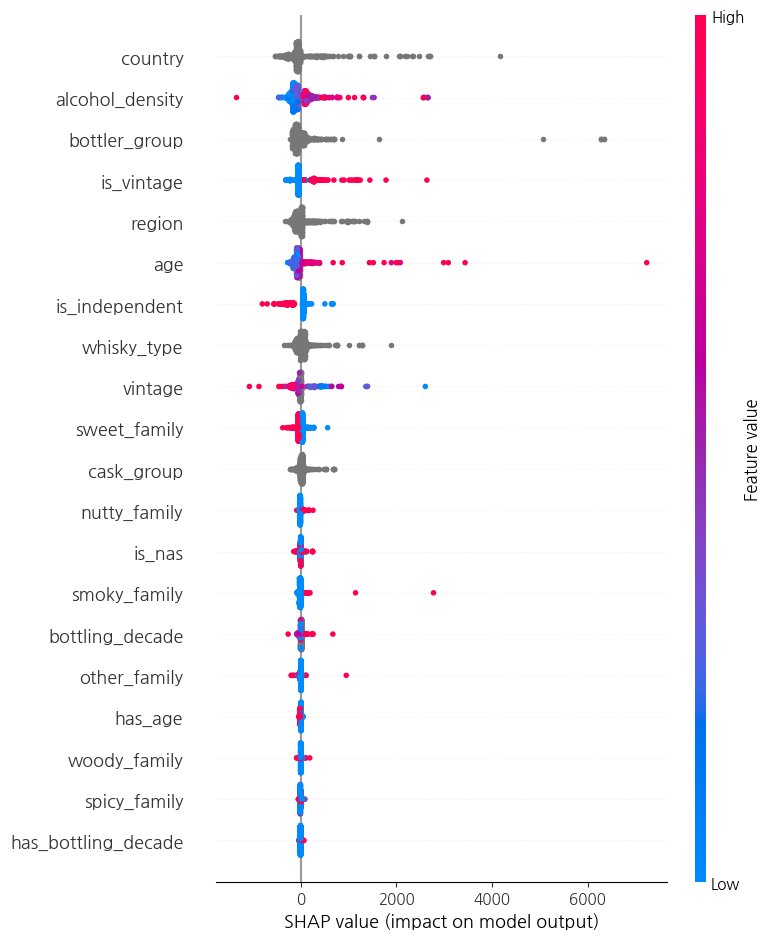

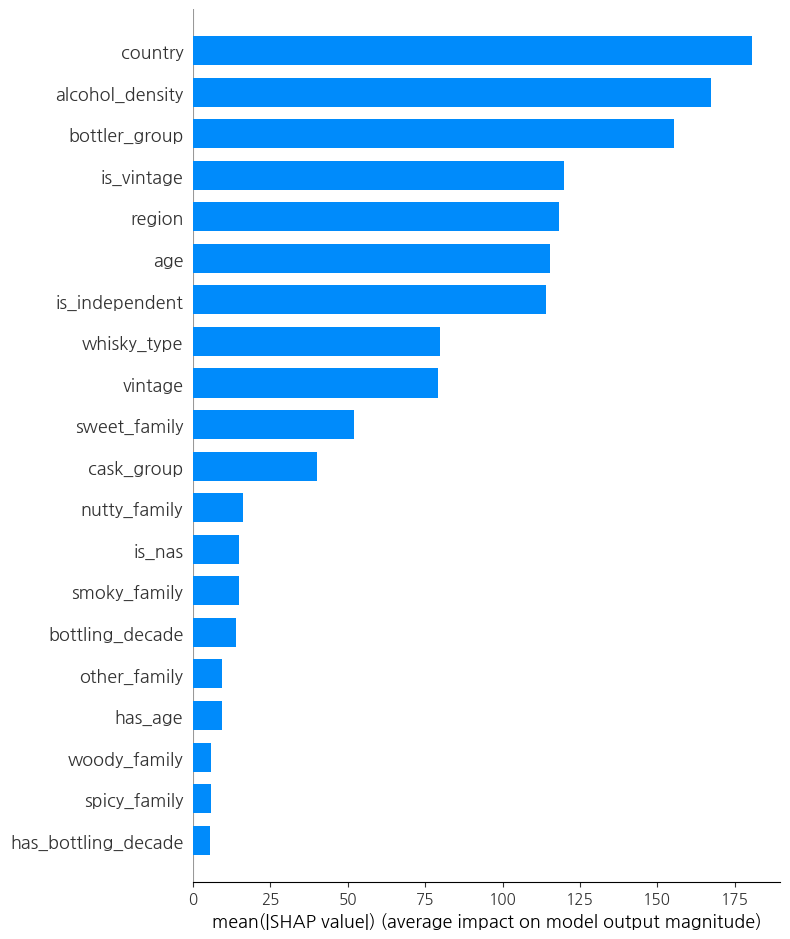

In [32]:
import shap
from sklearn.inspection import PartialDependenceDisplay


# 1. SHAP 준비
shap.initjs()

# X_train
X_shap = X_train

# 2. TreeExplainer로 SHAP 값 계산
explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(X_shap)

# 3. 전체 요약 (feature별 영향력 + 방향)
shap.summary_plot(shap_values, X_shap)

shap.summary_plot(shap_values, X_shap, plot_type='bar')

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=[
        "Price Distribution by Country",
        "Price Distribution by Whisky Type",
        "Price Distribution by Bottler Group"
    ],
    vertical_spacing=0.15,
    horizontal_spacing=0.05
)

# 1) Country
fig.add_trace(
    go.Box(x=df['country'], y=df['price(£)'], name="Country"),
    row=1, col=1
)

# 2) Whisky Type
fig.add_trace(
    go.Box(x=df['whisky_type'], y=df['price(£)'], name="Whisky Type"),
    row=1, col=2
)

# 3) Bottler Group (두 칸 전체 폭)
fig.add_trace(
    go.Box(x=df['bottler_group'], y=df['price(£)'], name="Bottler Group"),
    row=2, col=1
)

# 레이아웃 설정
fig.update_layout(
    height=1000,
    width=1200,
    showlegend=False,
    title_text="Whisky Price Analysis (Interactive Plotly Version)"
)

# x축 텍스트 회전
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)
fig.update_xaxes(tickangle=90, row=2, col=1)

fig.show()

| Country      | 가격 포지션/특징                                              | SHAP에서의 역할                               |
|--------------|----------------------------------------------------------------|------------------------------------------------|
| **Scotland** | 저가~초고가까지 전 구간 존재, 분포 가장 넓음 : 시장의 기본 축 | 중립적이지만 variance 큼. 조건에 따라 +/− 모두 발생 |
| **USA**      | 대부분 저가~중저가, 고가 라인업 거의 없음                      | **음의 SHAP** (가격 하락 신호)                 |
| **Japan**    | 평균 가격 가장 높음, 초고가 아웃라이어 다수 : 강한 프리미엄    | 강한 **양의 SHAP** (가격 상승 신호)            |
| **Ireland**  | 중저가 중심, 일부만 고가                                      | 약한 + 또는 중립적 SHAP                       |

------
| Whisky Type               | 가격 포지션                 | SHAP에서의 역할                     |
|---------------------------|-----------------------------|--------------------------------------|
| **Single Malt**          | 초고가 포함, 분산 최댓값    | 강한 **양의 SHAP** (가격 상승 신호) |
| **Blended Malt**         | 중간~중저가                 | 약한 양의 SHAP                      |
| **Blended**              | 저가 중심                   | **음의 SHAP** (가격 하락 신호)      |
| **Grain / Bourbon / Rye / etc** | 저가~중저가             | 음의 SHAP 또는 baseline 이하        |
| **Other**                | variance 크지만 수량 적음    | SHAP 변화 불규칙                     |


------
| 병입자 그룹 유형 | 특징 | 가격 포지션 | SHAP 역할 |
|------------------|-------|--------------|------------|
| **Ultra High-End**<br>(Thompson Bros, Compass Box, Distillery Bottling, Cadenhead’s, SMWS 등) | 한정판·싱글캐스크·레어 제품 다수 | ★★★★★ (초고가 중심) | 강한 **양의 SHAP** (가격 상승 신호) |
| **Mid Premium**<br>(Gordon & MacPhail, Hunter Laing, Douglas Laing, Elixir Distillers, North Star Spirits 등) | 프리미엄 중심, 일부 고가 라인업 있음 | ★★★★ (중고가 중심) | 약한 양의 SHAP |
| **Regular / Low Price**<br>(Berry Bros & Rudd, James Eadie, Wemyss 등) | 대중적 라인업, 고가 제품 희소 | ★★ (저가~중저가) | 중립 또는 **음의 SHAP** (가격 상승 신호 약함) |

#데이터 저장하기

In [34]:
df.columns

Index(['name', 'whisky_type', 'volume(cl)', 'alcohol(%)', 'alcohol_density',
       'price(£)', 'price_per_cl', 'style_body', 'style_richness',
       'style_smoke', 'style_sweetness', 'country', 'region', 'casktype',
       'cask_group', 'bottler', 'bottler_group', 'is_independent', 'colouring',
       'age', 'vintage', 'bottling_decade', 'is_vintage', 'has_age',
       'has_bottling_decade', 'is_nas', 'characters', 'nose', 'palate',
       'finish', 'food_paring', 'reviews', 'is_no_note', 'url', 'strong_smoke',
       'style_missing', 'flavour_note', 'smoky_family', 'fruity_family',
       'floral_family', 'herbal_family', 'sweet_family', 'nutty_family',
       'spicy_family', 'woody_family', 'earthy_family', 'malty_family',
       'creamy_family', 'wine_family', 'marine_family', 'other_family'],
      dtype='object')

In [35]:
save_cols = ['name', 'whisky_type', 'volume(cl)', 'alcohol(%)', 'alcohol_density',
       'price(£)', 'price_per_cl', 'style_body', 'style_richness',
       'style_smoke', 'style_sweetness', 'country', 'region', 'casktype',
       'cask_group', 'bottler', 'bottler_group', 'is_independent', 'colouring',
       'age', 'vintage', 'bottling_decade', 'is_vintage', 'has_age',
       'has_bottling_decade', 'is_nas', 'characters', 'nose', 'palate',
       'finish', 'food_paring', 'reviews', 'is_no_note', 'url', 'strong_smoke',
       'style_missing','flavour_note', 'smoky_family', 'fruity_family',
       'floral_family', 'herbal_family', 'sweet_family', 'nutty_family',
       'spicy_family', 'woody_family', 'earthy_family', 'malty_family',
       'creamy_family', 'wine_family', 'marine_family', 'other_family']
df[save_cols].to_csv('/content/drive/MyDrive/week_hands_on_project5/whiskey/dataset/whisky_eda.csv',index=False)